In [75]:
library(tidyverse)
data <- mpg 

## Part 1

#### 1. (2 pts) Using the mpg dataset, identify:

Response variable: hwy (highway miles per gallon)

Explanatory variable: displ (engine displacement in liters)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


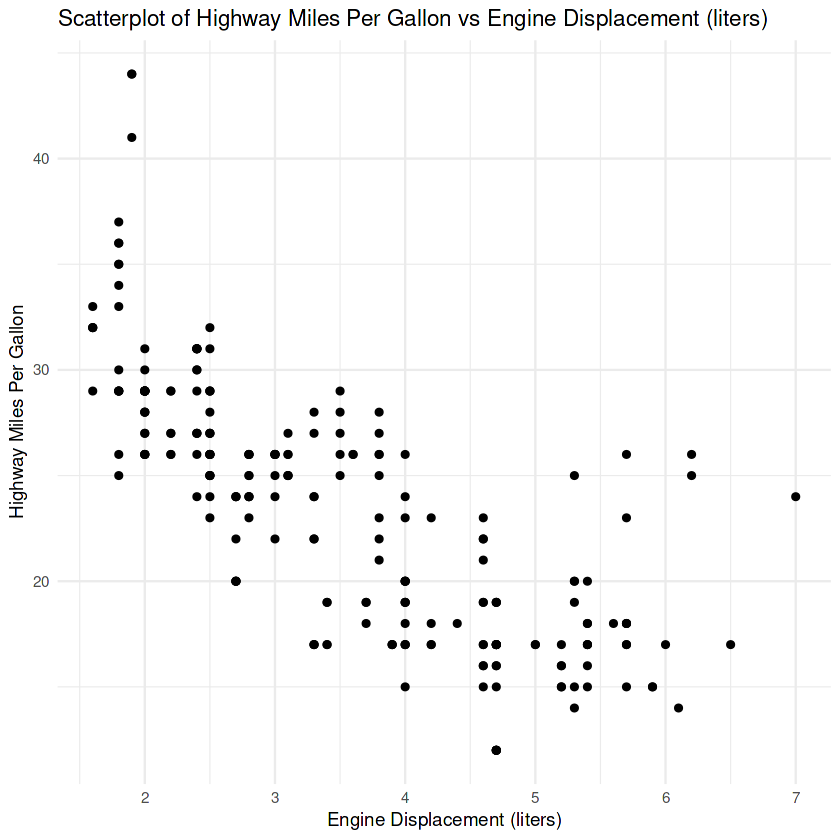

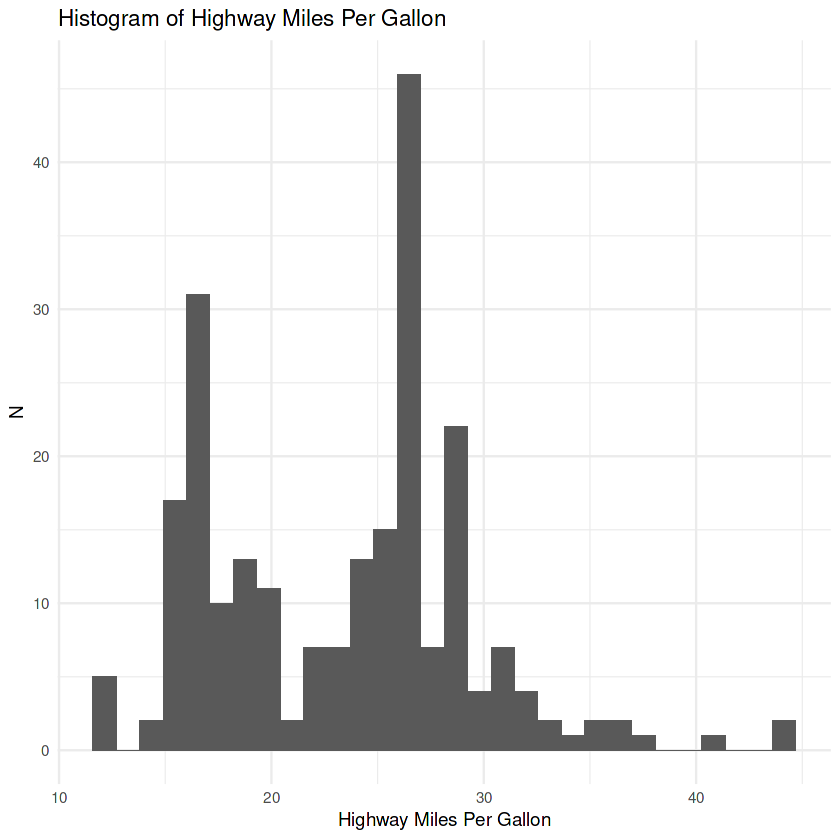

In [59]:
# 2. (4 pts) Create the following visualizations using the mpg dataset:
data %>%
    ggplot(aes(x = displ, y = hwy)) +
    geom_point() +
    theme_minimal() +
    labs(
        title = 'Scatterplot of Highway Miles Per Gallon vs Engine Displacement (liters)',
        x = 'Engine Displacement (liters)',
        y = 'Highway Miles Per Gallon'
    )

# One additional plot (histogram or boxplot) for either hwy or displ
data %>%
    ggplot(aes(x = hwy)) +
    geom_histogram() +
    theme_minimal() +
    labs(
        title = 'Histogram of Highway Miles Per Gallon',
        x = 'Highway Miles Per Gallon',
        y = 'N'
    )

## Part 2: Building a Simple Linear Model (8 points)

#### 1. (3 pts) Fit a simple linear regression model using the mpg dataset with: hwy as the response variable and displ as the explanatory variable.

displ 
-3.530589

(Intercept) 
   35.69765

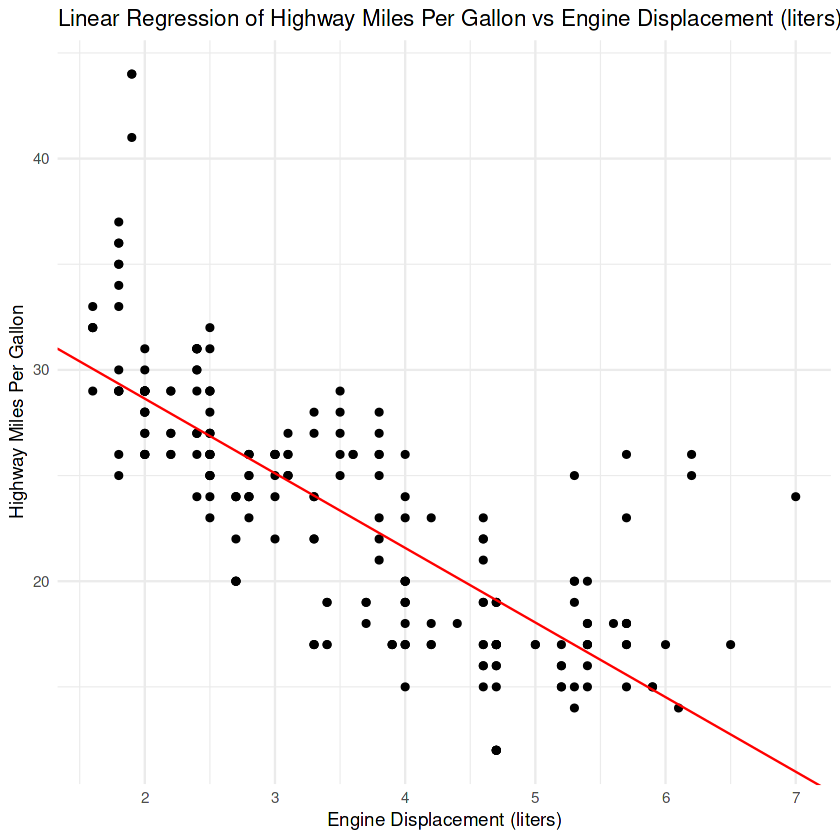

In [58]:
lr <- data %>%
    lm(hwy ~ displ, data = .)

lr_slope <- coef(lr)['displ']
lr_intercept <- coef(lr)['(Intercept)']

lr_slope
lr_intercept

data %>%
    ggplot(aes(x = displ, y = hwy)) +
    geom_point() +
    theme_minimal() +
    geom_abline(intercept = lr_intercept, slope = lr_slope, color = 'red') +
    labs(
        title = 'Linear Regression of Highway Miles Per Gallon vs Engine Displacement (liters)',
        x = 'Engine Displacement (liters)',
        y = 'Highway Miles Per Gallon'
    )

#### 2. (5 pts) Write the fitted model equation and interpret:

The model equation is hwy = 35.6977 - 3.5306x 

Given this equation, we see that -3.506 is our slope, and it matches the decline of the graph above.

With this, we can see that for each liter increase in x (displ which is engine displacement), hwy changes by -3.506. This means that larger engines tend to get lower hwy. In short, the larger the engine, the less fuel-efficient on the highway it is.

# Part 3: Model Assumptions and Diagnostics (8 points)

#### 1. (5 pts) Using your fitted mpg linear model, assess the following assumptions using diagnostic plots:

Linearity

Normality of residuals

Constant variance (homoscedasticity)

#### 2. (3 pts) Briefly explain whether each assumption appears to be satisfied for the mpg model. 

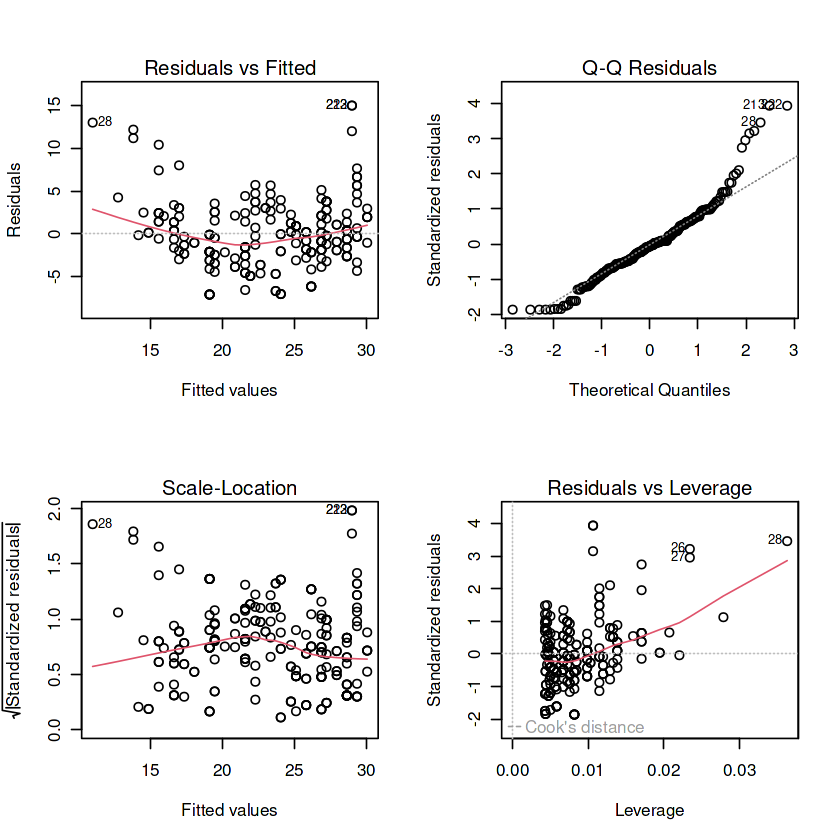

In [65]:
par(mfrow = c(2, 2))
plot(lr)

#### Linearity:

Using the Residuals vs Fitted graph, we see the red horizontal line is curved, indicating a non-linear relationship.

#### Normality of residuals:

For normality of residuals, we look at the Q-Q plot of the residuals. Given that the points mostly follow the abline, then we can conculde that the residuals are normally distributed.

#### Constant variance (homoscedasticity):

Lastly, we can use the Scale-Location graph to assess homoscedasticity. For this we expect the red horizontal line to stay straight. Given that we see a bend at about halfway, then we can conclude the heterodasticity of our data, meaning the variance of our dependent variable is unequal across our independent variable. Since it bends upwards, we can say that our model becomes less precise for higher hwy values.

# Part 4: Transformation or Model Critique (5 points)

#### 1. (3 pts) If any assumptions are violated in the mpg model, apply an appropriate transformation (e.g., log transformation of displ or hwy) OR justify why no transformation is necessary. 

If you look above, our previous graphs and assessments showed that our data is non-linear, and is no homoscedastic which violates the assumptions for linear regression. 

Thus, we must transform the data using log transformation. This is the transformation we choose since looking at the Q-Q plot, we already saw a very noticeable rise by the end of the graph, indicating that our data is right-skewed, which we can alleviate with a log transformation.

#### 2. (2 pts) Refit the model if transformed and briefly compare it with the original mpg model, or discuss the limitations of the simple linear model for this dataset. 

We can compare below the log transformed data and the original. We see that while the residuals vs fitted horizontal line straightens a little bit, it does not become completely straight, thus, it still indicates a non-linear relationship which violates one necessary assumption of linear regression.

The Q-Q plot also improves by lessening the outliers, but not removing them completely. Regardless, it still indicates normality of the residuals.

Finally, the Scale-Location horizontal line also straightens a little but not completely, and still, this violates the third assumption of homoscedasticity for linear regression.

From this we can conclude that we cannot reasonably use linear regression to model the relationship between Highway Miles per Gallon vs Engine Displacement (liters).

The simple linear model is limited because it assumes a strictly linear relationship between engine displacement and highway MPG, which is not fully supported by the data. Residual diagnostics reveal persistent heteroscedasticity and slight departures from normality, undermining some regression assumptions. Additionally, the model omits other important predictors, which could lead to biased estimates and poor predictive performance. Thus, a more flexible modeling approach or inclusion of additional variables might better capture the complexity of the data.

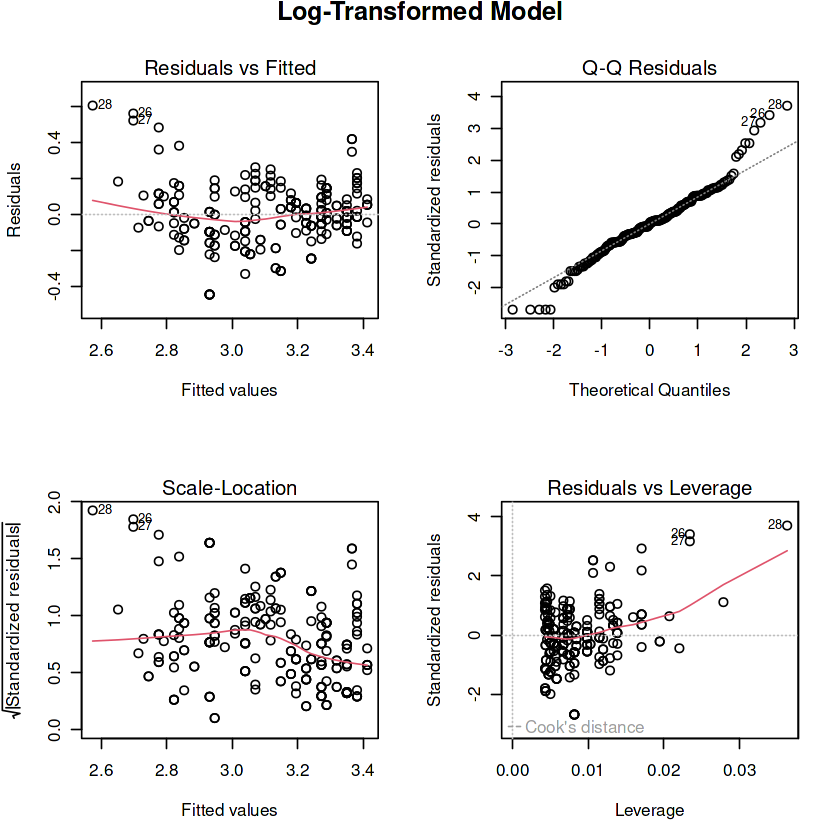

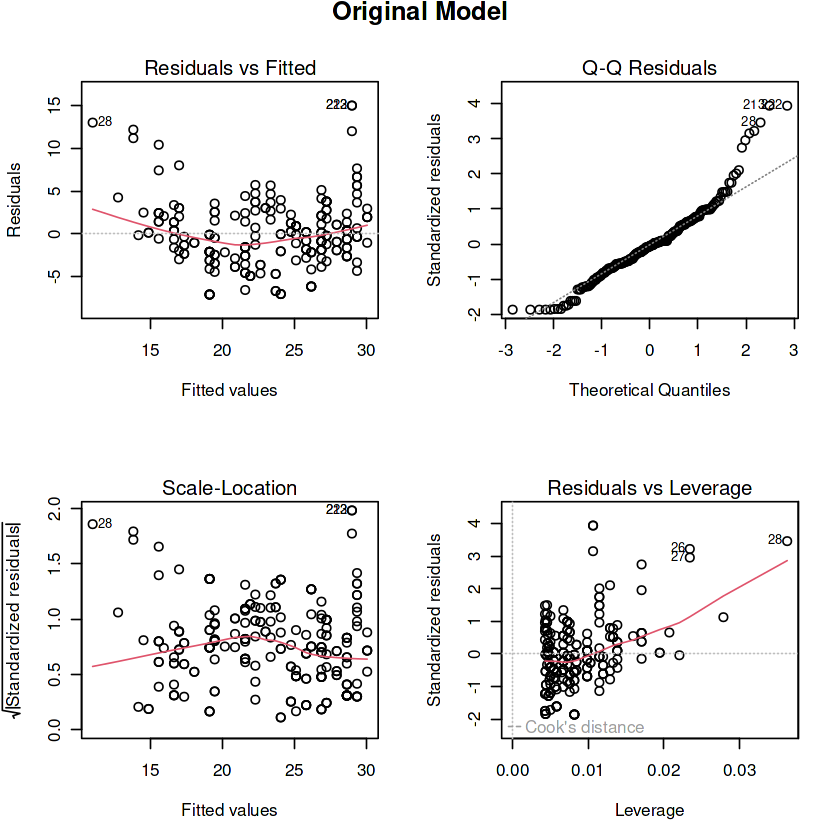

In [74]:
log_lr <- data %>%
    lm(log(hwy) ~ displ, data = .)

par(mfrow = c(2, 2))
plot(log_lr)
title(main = "Log-Transformed Model", outer = TRUE, line = -1, cex.main = 1.5)


par(mfrow = c(2, 2))
plot(lr)
title(main = "Original Model", outer = TRUE, line = -1, cex.main = 1.5)

# Part 5: Reflection (3 points)

#### In 3–5 sentences, reflect on your experience using the mpg dataset:

#### What you learned about the relationship between engine displacement and fuel efficiency

#### Why checking model assumptions is important when working with real-world data


Using the mpg dataset, I learned that engine displacement and highway fuel efficiency have a clear negative relationship—larger engines generally lead to lower MPG. However, the relationship is not perfectly linear, and residual diagnostics revealed violations of key regression assumptions like homoscedasticity and normality. This showed me that even seemingly straightforward data can have complexities that affect model reliability. Checking assumptions is crucial because it helps ensure that conclusions drawn from the model are valid and that the model accurately represents the data’s underlying patterns. Without this step, predictions and inferences might be misleading or incorrect.
